In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/measurements.csv")

In [6]:
df.describe()

,temperature_2m,relative_humidity_2m,precipitation,surface_pressure
count,17520.000000,17520.000000,17520.000000,17520.000000
mean,19.833516,73.889498,0.129892,912.478727
std,5.050487,18.988281,0.452241,3.100406
min,2.200000,17.000000,0.000000,902.400000
25%,16.800000,60.000000,0.000000,910.300000
50%,19.700000,78.000000,0.000000,912.500000
75%,23.400000,90.000000,0.000000,914.600000
max,36.400000,100.000000,10.900000,925.300000


In [16]:
df["temperature_2m"]

time                    0
temperature_2m          0
relative_humidity_2m    0
precipitation           0
surface_pressure        0
dtype: int64

<Axes: ylabel='Frequency'>

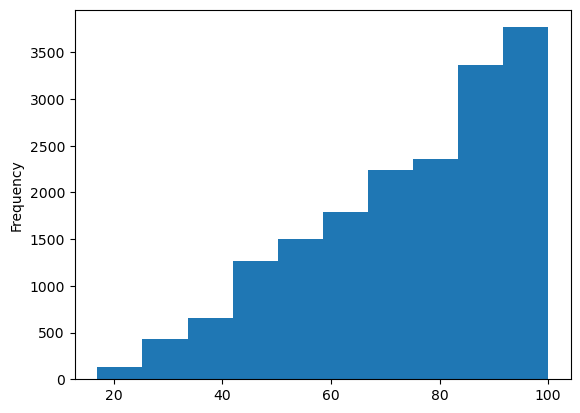

In [17]:
df["relative_humidity_2m"].plot.hist()

In [24]:
df["precipitation"].resample("1M")
df.()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
yearly = dataset.resample("1Y")
yearly.describe()